In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

## Create a random number generator

In [2]:
rng = np.random.RandomState(seed=0)

## Generate some 1D data points and labels from two Gaussian PDFs (two classes)

In [3]:
X=np.zeros((100,1))
Y=np.zeros((100,))
for n in range(0, 100):
    #randomly select a Gaussian component (c0, c1) with prob of 0.5
    r= int(rng.rand() > 0.5)  # randn ~ uniform random distribution
    if r == 0:
       # randomly draw a sample from the Gaussian component (mean = 2, std=1)
       sample =  2.5 + rng.randn() 
       Y[n]=0
    else:
       # randomly draw a sample from the Gaussian component (mean = 6, std=1)
       sample =  6 + 0.5*rng.randn() 
       Y[n]=1
    X[n]=sample

visualize the 1D data of the two classes by using 1D histogram

(array([ 3.,  1.,  5.,  6., 10., 12., 10.,  6.,  2.,  2.]),
 array([5.00461059, 5.2183662 , 5.43212181, 5.64587742, 5.85963302,
        6.07338863, 6.28714424, 6.50089985, 6.71465546, 6.92841107,
        7.14216668]),
 <BarContainer object of 10 artists>)

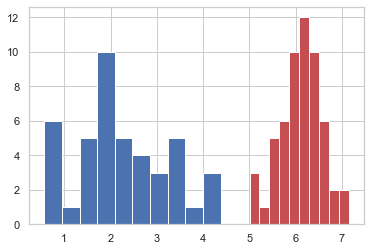

In [4]:
fig, ax = plt.subplots()
ax.hist(X[Y==0], bins=10, color='b')
ax.hist(X[Y==1], bins=10, color='r')

Estimate the PDF paramters

In [5]:
mu0=X[Y==0].mean()
sigma0=X[Y==0].std()
mu1=X[Y==1].mean()
sigma1=X[Y==1].std()
print('mu0', mu0, 'sigma0', sigma0)
print('mu1', mu1, 'sigma1', sigma1)

mu0 2.2882116004094626 sigma0 1.0198985189542802
mu1 6.1016936903177825 sigma1 0.4511106023413258


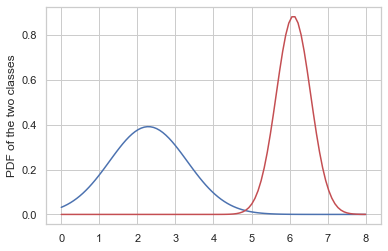

In [6]:
#show
x = np.linspace(0, 8, 100)
p1 = np.exp(-(x-mu0)**2/(2*sigma0**2))/(np.sqrt(2*np.pi*sigma0**2))
p2 = np.exp(-(x-mu1)**2/(2*sigma1**2))/(np.sqrt(2*np.pi*sigma1**2))
plt.plot(x, p1, 'b')
plt.plot(x, p2, 'r')
plt.ylabel('PDF of the two classes')
plt.show()

### Now, we buile a  naive bayes classifier
training on 90 datapoints with labels

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X[0:90,:], Y[0:90])

GaussianNB()

testing on the remaining 10 data points

In [8]:
Y_pred=gnb.predict(X[90:,:])
gnb.score(X[90:,:], Y[90:])

1.0

### Generate some 2D data points and labels from two Gaussian PDFs (two classes)

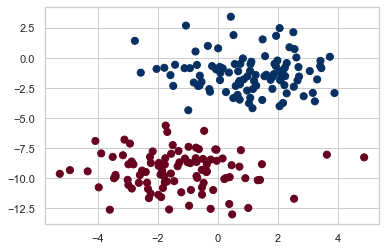

In [9]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='RdBu');

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    

[(-8.0, 8.0), (-15.0, 5.0)]

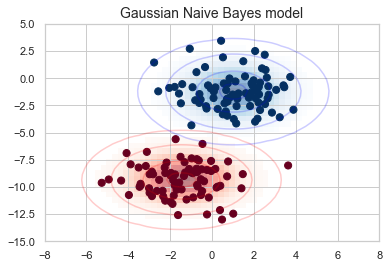

In [11]:
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='RdBu')
ax.set_title('Gaussian Naive Bayes model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (Y_train == label)
    mu, std = X_train[mask].mean(0), X_train[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
#ax.set_aspect('equal')

train a naive Bayes classifier

In [12]:
model = GaussianNB()
model.fit(X_train, Y_train);

test it on new data: testing set

In [13]:
model.score(X_test, Y_test)

1.0

In [14]:
Xnew = [-6, -14] + [14, 18] * rng.rand(5000, 2)
Ynew = model.predict(Xnew)

show the training and testing data, which basically reveals the decision boundary

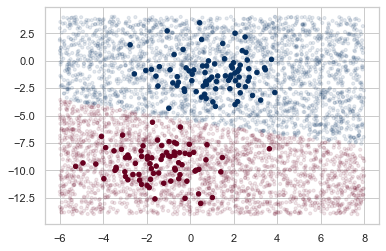

In [15]:
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, cmap='RdBu')
ax.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew, s=10, cmap='RdBu', alpha=0.1)
#ax.set_aspect('equal')

## Apply KNN to the same dataset
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [16]:
#step-1: create a KNN classifier and set K to 2   
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

In [17]:
#step-2: train the KNN classifier on the training set'
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
#step-3: test the KNN classifier on the testing set - obtain the accuracy
knn.score(X_test, Y_test)

1.0

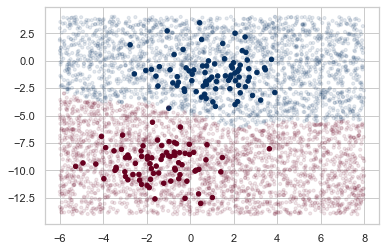

In [19]:
#step-4: visualize the result
Ynew = knn.predict(Xnew)
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, cmap='RdBu')
ax.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew, s=10, cmap='RdBu', alpha=0.1)
#ax.set_aspect('equal')